In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")

In [63]:
df=pd.read_csv("covid19.csv")
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2877,2878,10/06/20,8:00 AM,Tripura,-,-,192,1,864
2878,2879,10/06/20,8:00 AM,Uttarakhand,-,-,755,13,1537
2879,2880,10/06/20,8:00 AM,Uttar Pradesh,-,-,6669,301,11335
2880,2881,10/06/20,8:00 AM,West Bengal,-,-,3620,415,8985
2881,2882,10/06/20,8:00 AM,Cases being reassigned to states,-,-,0,0,9227


In [64]:
df.drop(df.tail(1).index,inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2881 entries, 0 to 2880
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       2881 non-null   int64 
 1   Date                      2881 non-null   object
 2   Time                      2881 non-null   object
 3   State/UnionTerritory      2881 non-null   object
 4   ConfirmedIndianNational   2881 non-null   object
 5   ConfirmedForeignNational  2881 non-null   object
 6   Cured                     2881 non-null   int64 
 7   Deaths                    2881 non-null   int64 
 8   Confirmed                 2881 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 225.1+ KB


In [66]:
df["Date"]=pd.to_datetime(df["Date"],format="%d/%m/%y")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2881 entries, 0 to 2880
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       2881 non-null   int64         
 1   Date                      2881 non-null   datetime64[ns]
 2   Time                      2881 non-null   object        
 3   State/UnionTerritory      2881 non-null   object        
 4   ConfirmedIndianNational   2881 non-null   object        
 5   ConfirmedForeignNational  2881 non-null   object        
 6   Cured                     2881 non-null   int64         
 7   Deaths                    2881 non-null   int64         
 8   Confirmed                 2881 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 225.1+ KB


In [68]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2876,2877,2020-06-10,8:00 AM,Telengana,-,-,1809,148,3920
2877,2878,2020-06-10,8:00 AM,Tripura,-,-,192,1,864
2878,2879,2020-06-10,8:00 AM,Uttarakhand,-,-,755,13,1537
2879,2880,2020-06-10,8:00 AM,Uttar Pradesh,-,-,6669,301,11335
2880,2881,2020-06-10,8:00 AM,West Bengal,-,-,3620,415,8985


In [69]:
features=["Date","State/UnionTerritory","Cured","Deaths","Confirmed"]

In [70]:
df=df[features]
df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
2876,2020-06-10,Telengana,1809,148,3920
2877,2020-06-10,Tripura,192,1,864
2878,2020-06-10,Uttarakhand,755,13,1537
2879,2020-06-10,Uttar Pradesh,6669,301,11335
2880,2020-06-10,West Bengal,3620,415,8985


In [71]:
dfTN=df[df["State/UnionTerritory"]=="Tamil Nadu"].drop("State/UnionTerritory",axis=1)
dfTN.tail()

,Date,Cured,Deaths,Confirmed
2731,2020-06-06,15762,232,28694
2767,2020-06-07,16395,251,30152
2803,2020-06-08,16999,269,31667
2839,2020-06-09,17527,286,33229
2875,2020-06-10,18325,307,34914


In [72]:
#dfTN.index=dfTN.Date

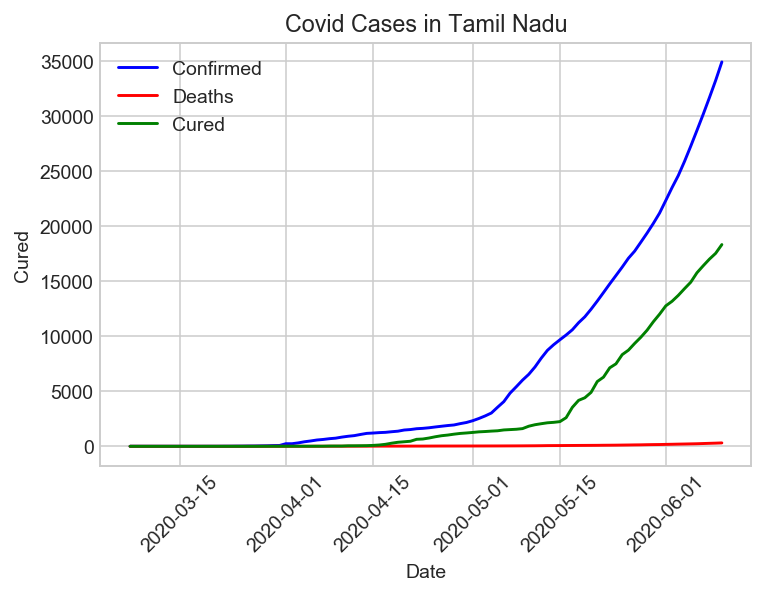

In [79]:
plt.figure(dpi=140)
sns.lineplot(x="Date",y="Confirmed",data=dfTN,color="blue")
sns.lineplot(x="Date",y="Deaths",data=dfTN,color="red")
sns.lineplot(x="Date",y="Cured",data=dfTN,color="green")
plt.legend(["Confirmed","Deaths","Cured"])
plt.title("Covid Cases in Tamil Nadu")
plt.xticks(rotation=45)
plt.show()

# First Lockdown at 25-03-2020

In [82]:
day1=pd.to_datetime("25/03/20",format="%d/%m/%y")
day1

Timestamp('2020-03-25 00:00:00')

In [86]:
# Taking the dataset only from the first lockdown
dfTN=dfTN[dfTN["Date"]>=day1]
dfTN.head()

,Date,Cured,Deaths,Confirmed
357,2020-03-25,1,0,18
387,2020-03-26,1,1,26
414,2020-03-27,1,1,29
441,2020-03-28,2,1,40
468,2020-03-29,4,1,49


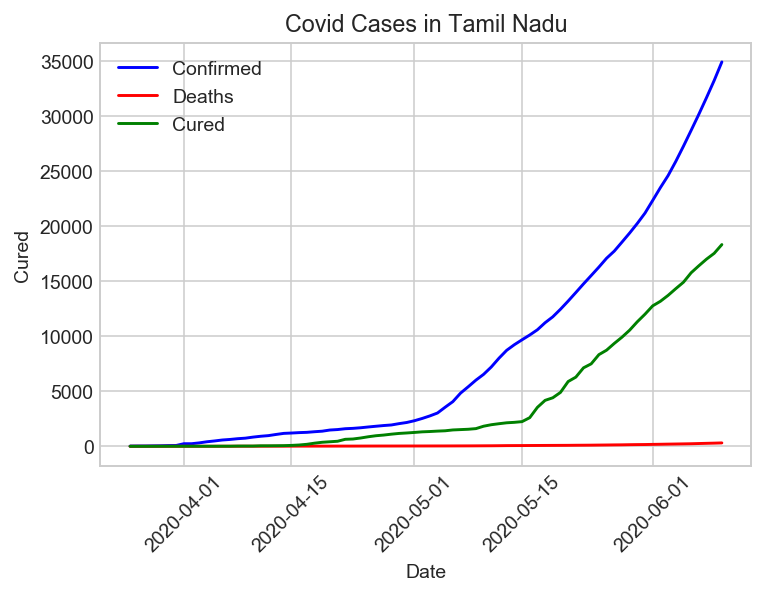

In [107]:
plt.figure(dpi=140)
sns.lineplot(x="Date",y="Confirmed",data=dfTN,color="blue")
sns.lineplot(x="Date",y="Deaths",data=dfTN,color="red")
sns.lineplot(x="Date",y="Cured",data=dfTN,color="green")
plt.legend(["Confirmed","Deaths","Cured"])
plt.title("Covid Cases in Tamil Nadu")
plt.xticks(rotation=45)
plt.show()

In [101]:
dfTN["Day"]=(dfTN["Date"]-day1).dt.days
dfTN.tail()

,Date,Cured,Deaths,Confirmed,Day
2731,2020-06-06,15762,232,28694,73
2767,2020-06-07,16395,251,30152,74
2803,2020-06-08,16999,269,31667,75
2839,2020-06-09,17527,286,33229,76
2875,2020-06-10,18325,307,34914,77


In [106]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.array(dfTN["Day"]).reshape(-1, 1),
                             dfTN["Confirmed"])
reg.score(np.array(dfTN["Day"]).reshape(-1, 1),dfTN["Confirmed"])

0.8046078843144429

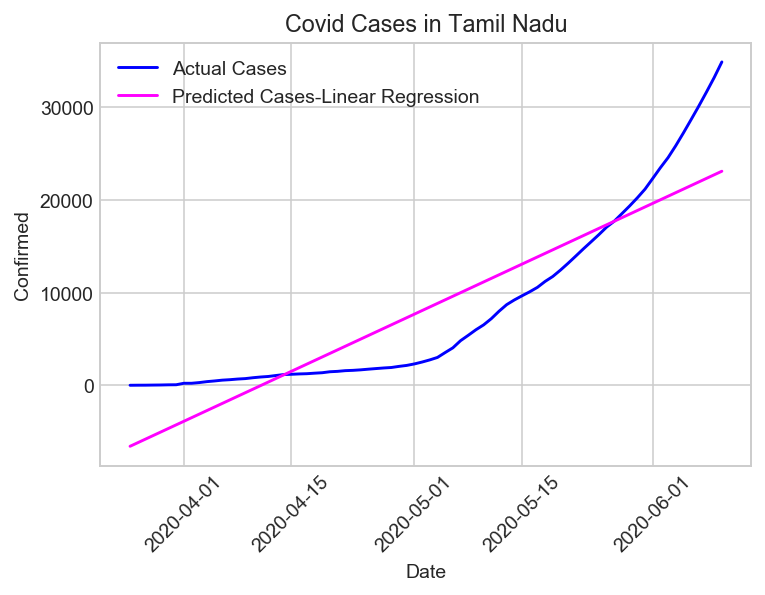

In [115]:
plt.figure(dpi=140)
sns.lineplot(x="Date",y="Confirmed",data=dfTN,color="blue")
sns.lineplot(x=dfTN["Date"]
             ,y=reg.predict(np.array(dfTN["Day"]).reshape(-1, 1))
             ,color="magenta")
plt.title("Covid Cases in Tamil Nadu")
plt.xticks(rotation=45)
plt.legend(["Actual Cases","Predicted Cases-Linear Regression"])
plt.show()

# Polynomial Regression

In [122]:
from sklearn.preprocessing import PolynomialFeatures
polyX=PolynomialFeatures(3).fit_transform(np.array(dfTN["Day"]).reshape(-1, 1))
polyreg = LinearRegression().fit(polyX,dfTN["Confirmed"])
polyreg.score(polyX,dfTN["Confirmed"])

0.9978540701653644

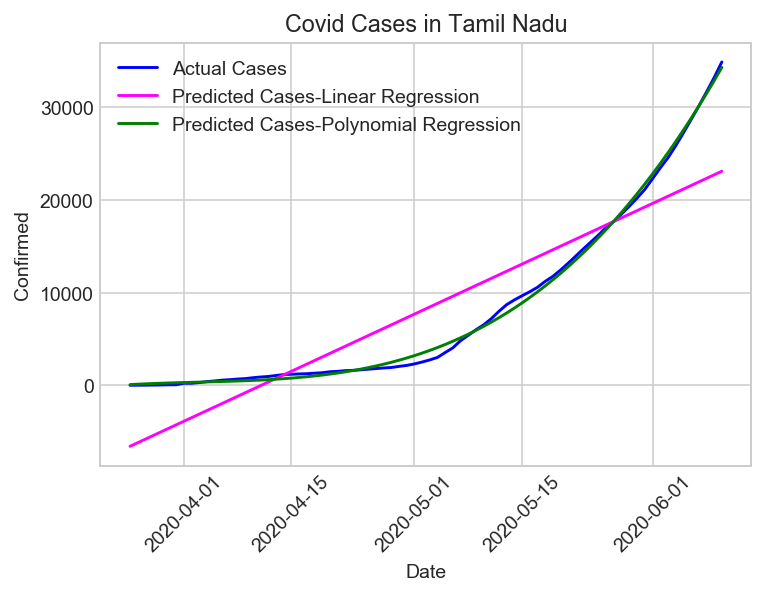

In [124]:
plt.figure(dpi=140)
sns.lineplot(x="Date",y="Confirmed",data=dfTN,color="blue")
sns.lineplot(x=dfTN["Date"]
             ,y=reg.predict(np.array(dfTN["Day"]).reshape(-1, 1))
             ,color="magenta")
sns.lineplot(x=dfTN["Date"],y=polyreg.predict(polyX),color="green")
plt.title("Covid Cases in Tamil Nadu")
plt.xticks(rotation=45)
plt.legend(["Actual Cases","Predicted Cases-Linear Regression",
           "Predicted Cases-Polynomial Regression"])
plt.show()

In [139]:
find=["01/07/20","09/07/20","15/07/20"]
find1=pd.to_datetime(find,format="%d/%m/%y")
find1

DatetimeIndex(['2020-07-01', '2020-07-09', '2020-07-15'], dtype='datetime64[ns]', freq=None)

In [140]:
find2=(find1-day1).days.values
find2

array([ 98, 106, 112], dtype=int64)

In [141]:
find3=PolynomialFeatures(3).fit_transform(find2.reshape(-1, 1))
find3

array([[1.000000e+00, 9.800000e+01, 9.604000e+03, 9.411920e+05],
       [1.000000e+00, 1.060000e+02, 1.123600e+04, 1.191016e+06],
       [1.000000e+00, 1.120000e+02, 1.254400e+04, 1.404928e+06]])

In [142]:
# Predicted Answer
find4=polyreg.predict(find3)
find4

array([ 75208.81406943,  96889.44459132, 115665.70489006])

In [143]:
print("Prediction for Tamil Nadu")
pd.DataFrame({"Date":find,
             "Predicted Cases":find4.astype("int")})

Prediction for Tamil Nadu


,Date,Predicted Cases
0,01/07/20,75208
1,09/07/20,96889
2,15/07/20,115665
